In [ ]:
from google.colab import drive

In [ ]:
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
wind_data = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/train-en.csv')

In [ ]:
wind_data.head()

,Date,wind_speed48M,wind_speed100M,wind_speed152M,wind_direction48M,wind_direction100M,wind_direction152M,wind_speed_100MP10,wind_speed_100MP20,wind_speed_100MP30,wind_speed_100MP40,wind_speed_100MP50,wind_speed_100MP60,wind_speed_100MP70,wind_speed_100MP80,wind_speed_100MP90,Interpolated,available_capacity,Output
0,2016-01-01 0:00:00,8.490,10.7700,12.690,188.00,190.0,194.00,9.0700,9.630,10.060,10.43,10.78,11.0500,11.5400,11.940,12.4200,0,122400,79168
1,2016-01-01 0:15:00,8.395,10.6175,12.475,190.75,193.0,196.75,9.0425,9.555,9.955,10.31,10.63,10.9275,11.3875,11.815,12.3125,1,122400,75124
2,2016-01-01 0:30:00,8.300,10.4650,12.260,193.50,196.0,199.50,9.0150,9.480,9.850,10.19,10.48,10.8050,11.2350,11.690,12.2050,1,122400,76072
3,2016-01-01 0:45:00,8.205,10.3125,12.045,196.25,199.0,202.25,8.9875,9.405,9.745,10.07,10.33,10.6825,11.0825,11.565,12.0975,1,122400,67964
4,2016-01-01 1:00:00,8.110,10.1600,11.830,199.00,202.0,205.00,8.9600,9.330,9.640,9.95,10.18,10.5600,10.9300,11.440,11.9900,0,122400,69988


In [ ]:
wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52508 entries, 0 to 52507
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                52508 non-null  object 
 1   wind_speed48M       52508 non-null  float64
 2   wind_speed100M      52508 non-null  float64
 3   wind_speed152M      52508 non-null  float64
 4   wind_direction48M   52508 non-null  float64
 5   wind_direction100M  52508 non-null  float64
 6   wind_direction152M  52508 non-null  float64
 7   wind_speed_100MP10  52508 non-null  float64
 8   wind_speed_100MP20  52508 non-null  float64
 9   wind_speed_100MP30  52508 non-null  float64
 10  wind_speed_100MP40  52508 non-null  float64
 11  wind_speed_100MP50  52508 non-null  float64
 12  wind_speed_100MP60  52508 non-null  float64
 13  wind_speed_100MP70  52508 non-null  float64
 14  wind_speed_100MP80  52508 non-null  float64
 15  wind_speed_100MP90  52508 non-null  float64
 16  Inte

## Correlation

In [ ]:
def plot_correlation_heatmap(data):
    """
    Plots a correlation heatmap for the numerical features in the dataset.

    Parameters:
    data (DataFrame): The dataset containing the features and target.
    """
    # The below line of code selects only numerical columns from the DataFrame to focus on correlation between numerical features
    numerical_data = data.select_dtypes(include=['int64', 'float64'])

    # This below line of code calculates the correlation matrix for the numerical columns, which will be used to visualize the relationships between features
    correlation_matrix = numerical_data.corr()

    #The below line of code sets up the size of the matplotlib figure for the heatmap to ensure it's large enough to be clearly visible
    plt.figure(figsize=(10, 8))

    # The below line of code draws the heatmap with seaborn; annot=True displays the correlation coefficients, fmt=".2f" formats them to 2 decimal places, cmap='coolwarm' sets the color theme, and cbar=True includes a color bar for reference
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

    # The below line of code sets the title of the plot, clearly indicating what the plot represents
    plt.title('Correlation Heatmap of Numerical Features')

    # The below line displays the plot
    plt.show()

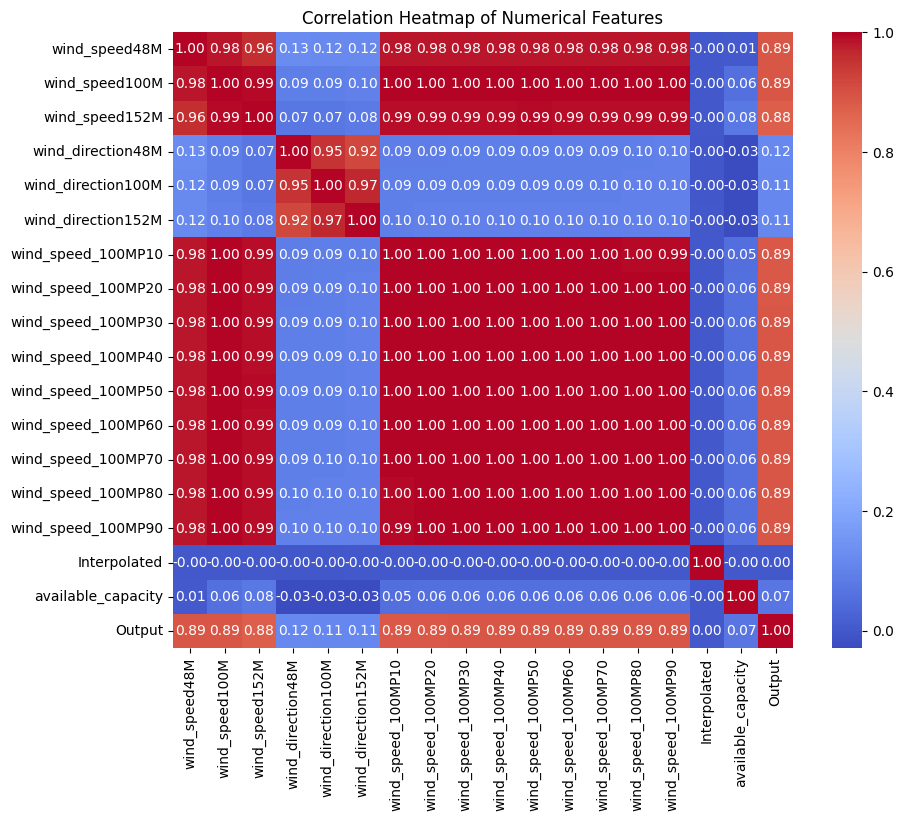

In [ ]:
#Calling the plot_correlation_heatmap function to visualize the correlation between all numerical variables in the 'car_sales_df' DataFrame.
plot_correlation_heatmap(wind_data)

# Wind Speed 48M

In [ ]:
x_train = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/train-en.csv', usecols=["wind_speed48M"])

In [ ]:
x_test = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/eval-en.csv', usecols=["wind_speed48M"])

In [ ]:
y_train = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/train-en.csv', usecols=["Output"])

In [ ]:
y_test = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/eval-en.csv', usecols=["Output"])

In [ ]:
x_train.head()

,wind_speed48M
0,8.490
1,8.395
2,8.300
3,8.205
4,8.110


In [ ]:
y_train.head()

,Output
0,79168
1,75124
2,76072
3,67964
4,69988


In [ ]:
x_train.describe()

,wind_speed48M
count,52508.000000
mean,5.626846
std,2.466787
min,0.550000
25%,3.925000
50%,5.330000
75%,6.965000
max,18.870000


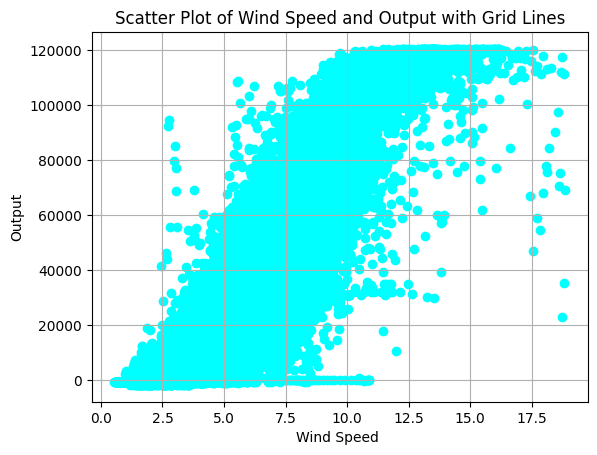

In [ ]:
plt.scatter(x_train["wind_speed48M"], y_train["Output"], color="cyan")
plt.grid()
plt.xlabel('Wind Speed ')
plt.ylabel('Output')
plt.title('Scatter Plot of Wind Speed and Output with Grid Lines')
plt.show()

In [ ]:
wind_data48M = pd.concat([x_train, y_train], axis=1)

def turbine_function(wind_speed, output):
  low_wind_threshold = 5
  high_wind_threshold = 12.5

  min_output_low_wind = 60000
  min_output_med_wind = 50000
  max_output_med_wind = 150000
  min_output_high_wind = 100000

  if wind_speed < low_wind_threshold:
    return output <= min_output_low_wind
  elif wind_speed <= high_wind_threshold:
    return min_output_med_wind <= output <= max_output_med_wind
  else:
    return output >= min_output_high_wind

wind_data48M['Functional'] = wind_data.apply(lambda row: turbine_function(row['wind_speed48M'], row['Output']), axis=1)

In [ ]:
wind_data48M

,wind_speed48M,Output,Functional
0,8.490,79168,True
1,8.395,75124,True
2,8.300,76072,True
3,8.205,67964,True
4,8.110,69988,True
...,...,...,...
52503,4.920,13688,True
52504,5.030,17624,False
52505,5.030,18528,False
52506,5.030,15836,False


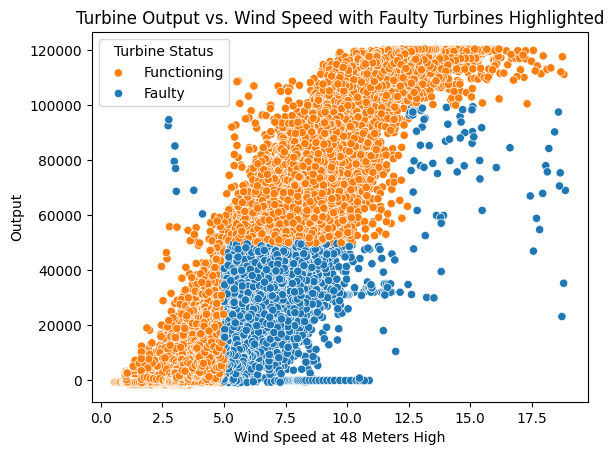

In [ ]:
sns.scatterplot(data=wind_data48M, x= 'wind_speed48M', y = 'Output', hue='Functional')
plt.xlabel('Wind Speed at 48 Meters High')
plt.ylabel('Output')
plt.title('Turbine Output vs. Wind Speed with Faulty Turbines Highlighted')
plt.legend(title='Turbine Status', labels=['Functioning', 'Faulty'])
plt.show()

In [ ]:
reg = LinearRegression().fit(x_train, y_train)
scores = reg.score(x_train, y_train)

predictions = reg.predict(x_test)
print (predictions)

[[19082.66141229]
 [19875.38570799]
 [20668.11000369]
 ...
 [77532.8661483 ]
 [77532.8661483 ]
 [77532.8661483 ]]


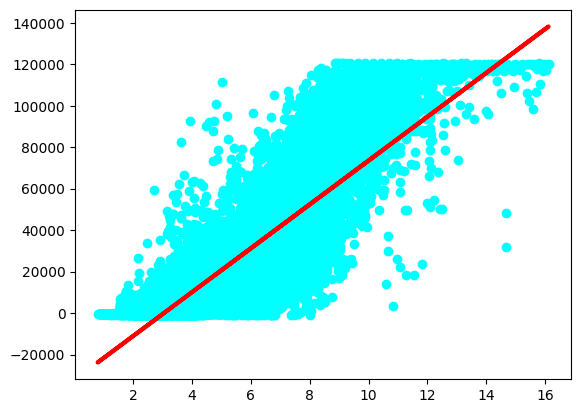

In [ ]:
plt.scatter(x_test["wind_speed48M"], y_test["Output"], color="cyan")
plt.plot(x_test, predictions, color="red", linewidth=3)
plt.show()

In [ ]:
MAE48 = mean_absolute_error(y_test, predictions),  # Mean Absolute Error
MSE48 = mean_squared_error(y_test, predictions),  # Mean Squared Error
RMSE48 = np.sqrt(mean_squared_error(y_test, predictions)),  # Root Mean Squared Error
R2_48 = r2_score(y_test, predictions)

print ("Mean Absolute Error", MAE48)
print ("Mean Squared Error", MSE48)
print ("Root Mean Squared Error", RMSE48)
print ("R-squared", R2_48)

Mean Absolute Error (11803.778406874892,)
Mean Squared Error (250526557.06287315,)
Root Mean Squared Error (15828.030738625483,)
R-squared 0.7639954710012081


In [ ]:
predictions.shape

(17668, 1)

### **Errors**

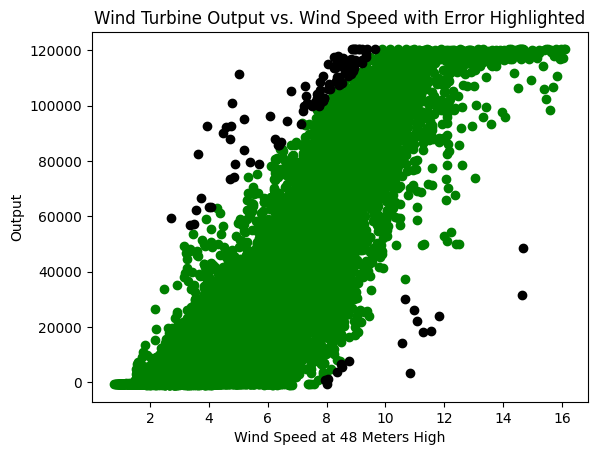

In [ ]:
predictions = predictions.flatten()

errors = y_test["Output"] - predictions

error_threshold = 50000

discrete_error = np.where ((errors > error_threshold) | (errors < -error_threshold), 1, 0)

faulty_indices = discrete_error == 1
normal_indices = discrete_error == 0

plt.scatter(x_test["wind_speed48M"][normal_indices], y_test["Output"][normal_indices], color="green", label="Normal Operation")
plt.scatter(x_test["wind_speed48M"][faulty_indices], y_test["Output"][faulty_indices], color="black", label="Faulty Operation")


plt.xlabel('Wind Speed at 48 Meters High')
plt.ylabel('Output')
plt.title('Wind Turbine Output vs. Wind Speed with Error Highlighted')
plt.show()

In [ ]:
discrete_error.shape

(17668,)

In [ ]:
normal_indices.shape

(17668,)

In [ ]:
Errors

### Prediction 8

In [ ]:
wind_speed_to_measure = np.array([[8]])
predictions = reg.predict(wind_speed_to_measure)
print (predictions)

[[52377.08183154]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Wind Speed 152M

In [ ]:
x_train3 = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/train-en.csv', usecols=["wind_speed152M"])
x_test3 = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/eval-en.csv', usecols=["wind_speed152M"])

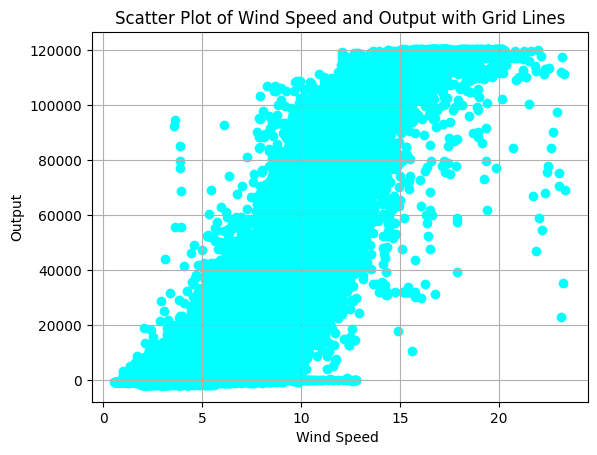

In [ ]:
plt.scatter(x_train3["wind_speed152M"], y_train["Output"], color="cyan")
plt.grid()
plt.xlabel('Wind Speed ')
plt.ylabel('Output')
plt.title('Scatter Plot of Wind Speed and Output with Grid Lines')
plt.show()

In [ ]:
reg = LinearRegression().fit(x_train3, y_train)
scores = reg.score(x_train3, y_train)

predictions = reg.predict(x_test3)
print (predictions)

[[18113.20211469]
 [18817.3814946 ]
 [19521.56087451]
 ...
 [76325.36418744]
 [76325.36418744]
 [76325.36418744]]


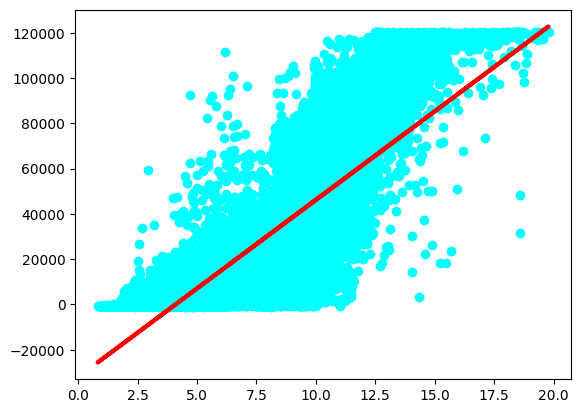

In [ ]:
plt.scatter(x_test3["wind_speed152M"], y_test["Output"], color="cyan")
plt.plot(x_test3, predictions, color="red", linewidth=3)
plt.show()

In [ ]:
MAE152 = mean_absolute_error(y_test, predictions),  # Mean Absolute Error
MSE152 = mean_squared_error(y_test, predictions),  # Mean Squared Error
RMSE152 = np.sqrt(mean_squared_error(y_test, predictions)),  # Root Mean Squared Error
R2_152 = r2_score(y_test, predictions)

print ("Mean Absolute Error", MAE152)
print ("Mean Squared Error", MSE152)
print ("Root Mean Squared Error", RMSE152)
print ("R-squared", R2_152)

Mean Absolute Error (12984.010219238153,)
Mean Squared Error (293241766.7456527,)
Root Mean Squared Error (17124.30339446404,)
R-squared 0.7237562921274927


# **Wind Direction 48M**

In [ ]:
x_train1 = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/train-en.csv', usecols=["wind_direction48M"])
x_test1 = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/eval-en.csv', usecols=["wind_direction48M"])

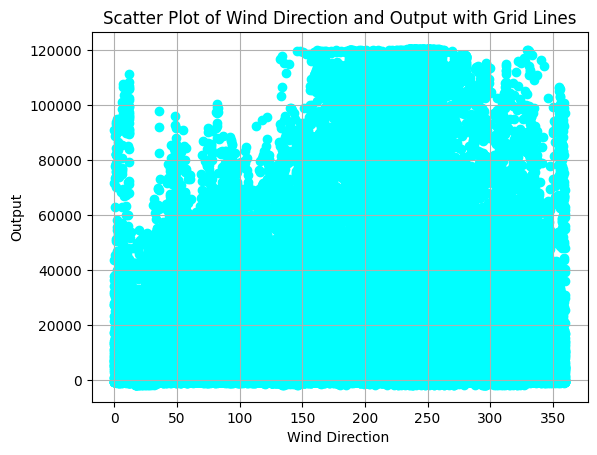

In [ ]:
plt.scatter(x_train1["wind_direction48M"], y_train["Output"], color="cyan")
plt.grid()
plt.xlabel('Wind Direction ')
plt.ylabel('Output')
plt.title('Scatter Plot of Wind Direction and Output with Grid Lines')
plt.show()

In [ ]:
reg = LinearRegression().fit(x_train1, y_train)
scores = reg.score(x_train1, y_train)

predictions = reg.predict(x_test1)
print (predictions)

[[30043.46682712]
 [30034.07232808]
 [30024.67782904]
 ...
 [28014.25503437]
 [28014.25503437]
 [28014.25503437]]


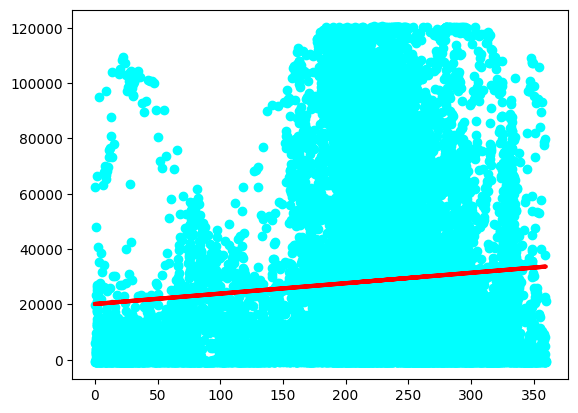

In [ ]:
plt.scatter(x_test1["wind_direction48M"], y_test["Output"], color="cyan")
plt.plot(x_test1, predictions, color="red", linewidth=3)
plt.show()

# Available Capacity

In [ ]:
x_train2 = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/train-en.csv', usecols=["available_capacity"])
x_test2 = pd.read_csv('/content/gdrive/My Drive/bbdc_2018/eval-en.csv', usecols=["available_capacity"])

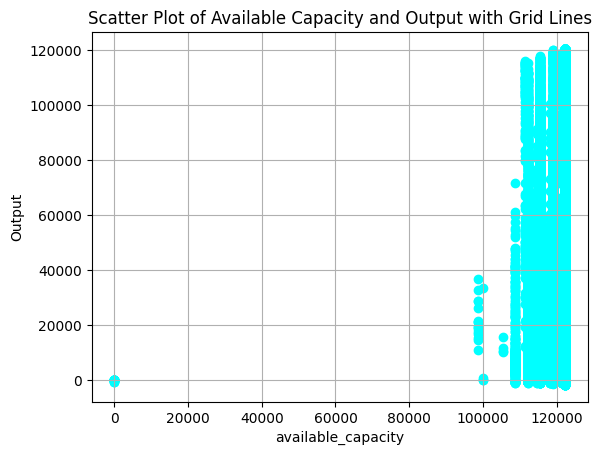

In [ ]:
plt.scatter(x_train2["available_capacity"], y_train["Output"], color="cyan")
plt.grid()
plt.xlabel('available_capacity')
plt.ylabel('Output')
plt.title('Scatter Plot of Available Capacity and Output with Grid Lines')
plt.show()